# Importing Libaries

###  This data set for classification algorithm practice on inequality of income

In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
pip install evidently

                                              0.0/3.4 MB ? eta -:--:--
                                              0.1/3.4 MB 2.6 MB/s eta 0:00:02
     ---                                      0.3/3.4 MB 4.9 MB/s eta 0:00:01
     ----------                               0.9/3.4 MB 7.9 MB/s eta 0:00:01
     ---------------                          1.3/3.4 MB 9.4 MB/s eta 0:00:01
     ---------------------------              2.4/3.4 MB 11.5 MB/s eta 0:00:01
     ---------------------------------------  3.4/3.4 MB 14.3 MB/s eta 0:00:01
     ---------------------------------------- 3.4/3.4 MB 13.5 MB/s eta 0:00:00
                                              0.0/9.9 MB ? eta -:--:--
     ---                                      0.8/9.9 MB 25.4 MB/s eta 0:00:01
     ---------                                2.3/9.9 MB 29.1 MB/s eta 0:00:01
     -------------                            3.2/9.9 MB 22.9 MB/s eta 0:00:01
     ------------------                       4.7/9.9 MB 27.1 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

###  Reading Data

In [4]:
df=pd.read_csv('C:/Users/kripa/OneDrive/Documents/ML/ML-Project/EDA/Income_Equality/Dataset/Inequality.csv')

In [5]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [6]:
# Shape
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 209499 Columns: 43


In [7]:
# Statistical Summary
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [8]:
# Transpose
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [9]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

#### Exploratory Data Analysis 

In [10]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 13
Discrete feature Count 4
Continuous feature Count 9
Categorical feature Count 30


In [11]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [12]:
# Count the number of '?' in each column
question_mark_counts = (df == ' ?').sum()

# Count the number of columns with at least one '?'
columns_with_question_mark = question_mark_counts[question_mark_counts > 0].count()
print(columns_with_question_mark)

8


In [13]:
# Replace ' ?' with a nan
df.replace({' ?':np.nan},inplace=True)

In [14]:
# Count the number of '?' in each column
question_mark_counts = (df == ' ?').sum()

# Count the number of columns with at least one '?'
columns_with_question_mark = question_mark_counts[question_mark_counts > 0].count()
print(columns_with_question_mark)

0


In [15]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

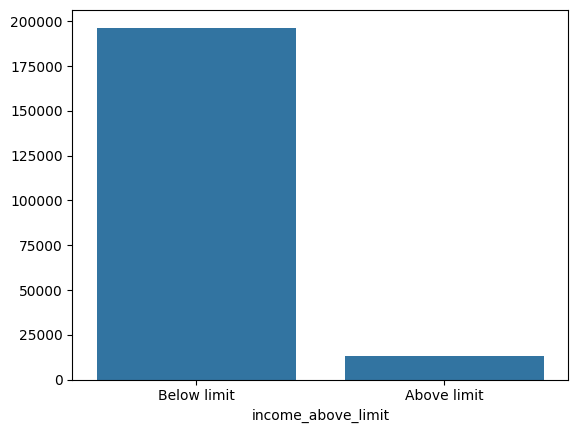

In [16]:
sns.barplot(x=df['income_above_limit'].value_counts().index,
            y=df['income_above_limit'].value_counts().values)
plt.show()

 
 ###### The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 93.8% values have income less than limit and 6.2% values have income more than limitSo many null values are also present which is not great

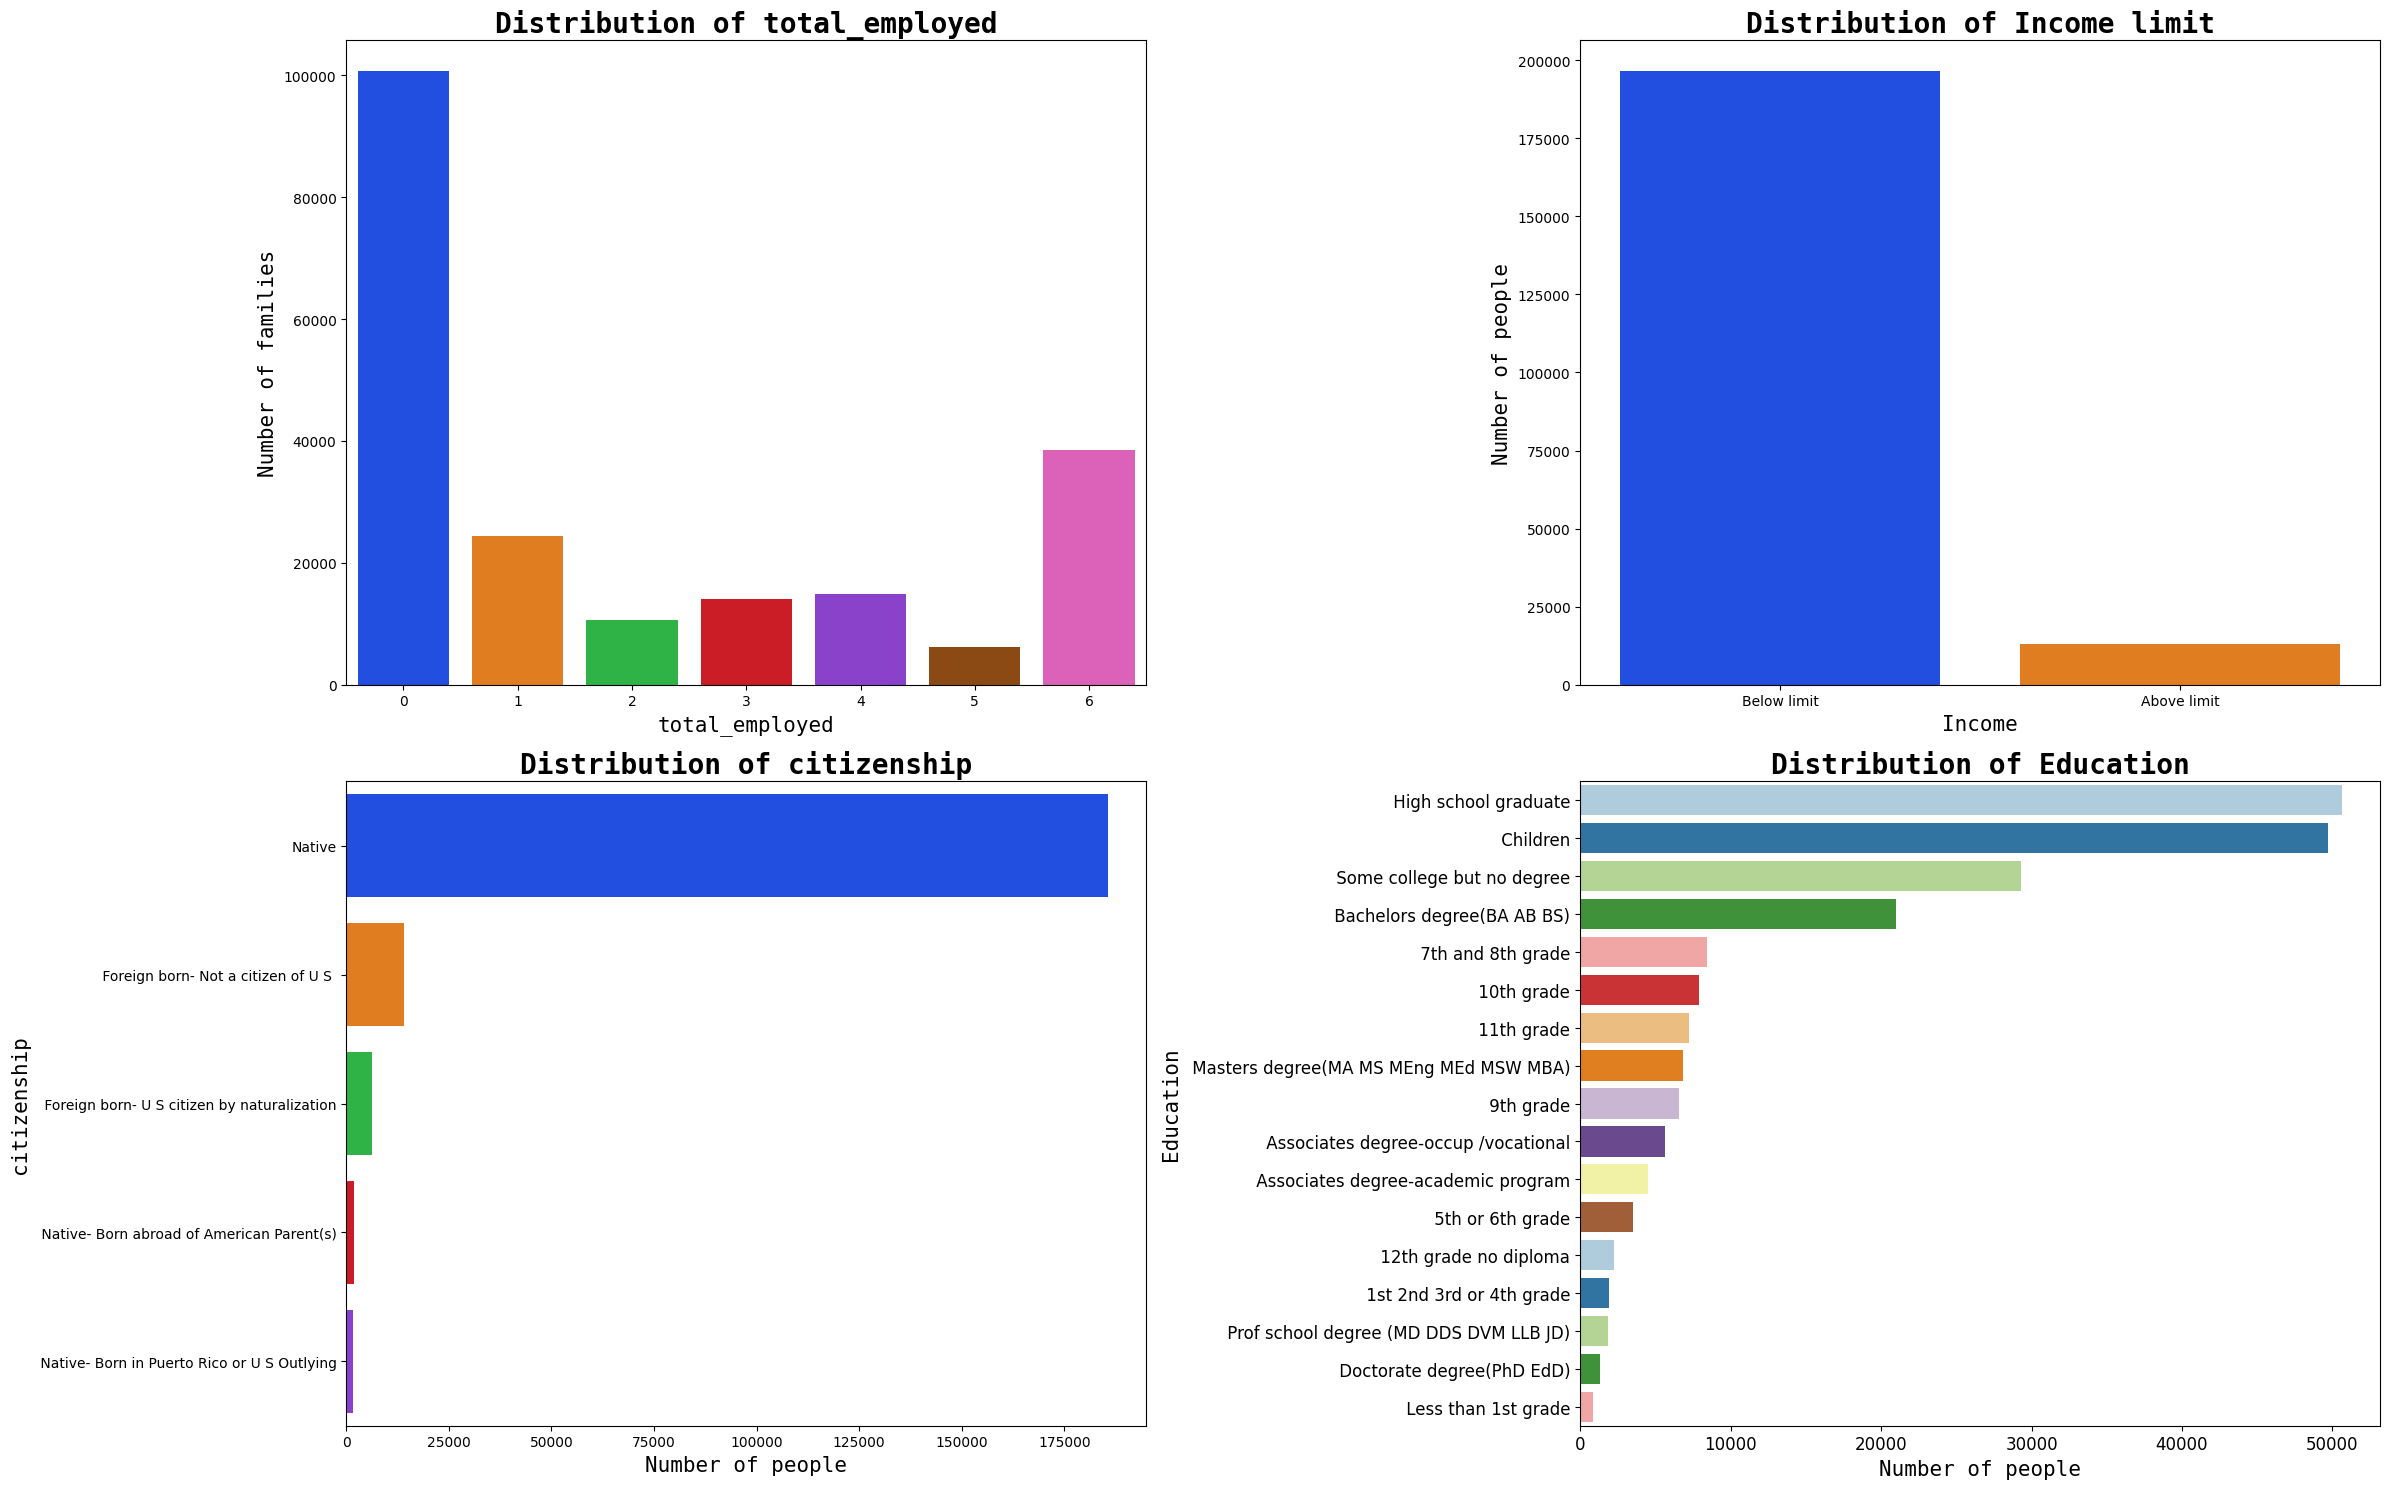

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 1: Does education have any impact on income?</font>

In [18]:
edu_df = df.copy(deep=True)

edu_df['education'].value_counts()

education
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: count, dtype: int64

<Axes: ylabel='education'>

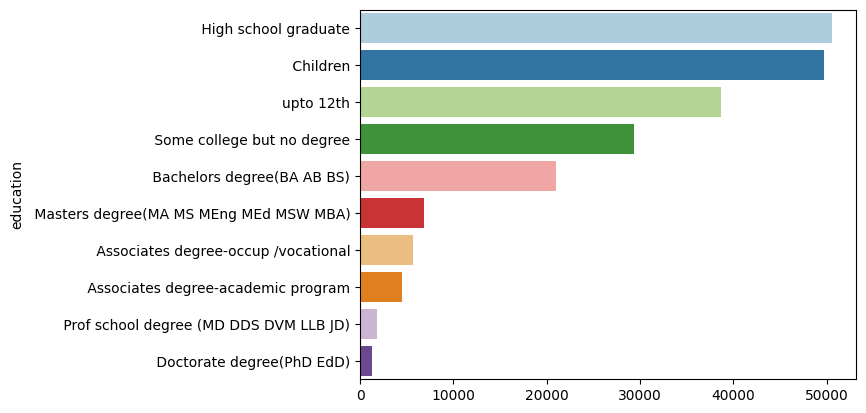

In [19]:
edu_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

edu = edu_df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired')

In [20]:
print('Income below limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')
print('Income above limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Above limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')

Income below limit for people upto 12th: 99.111409604009 %
Income above limit for people upto 12th: 0.8885903959910109 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
* People with education upto only 12th are under the income limit with a few exceptions
* There are so many childrens in the data 
* Also after converting all the grades upto 12th we find that also forms a major proportion if combined

## Distribution

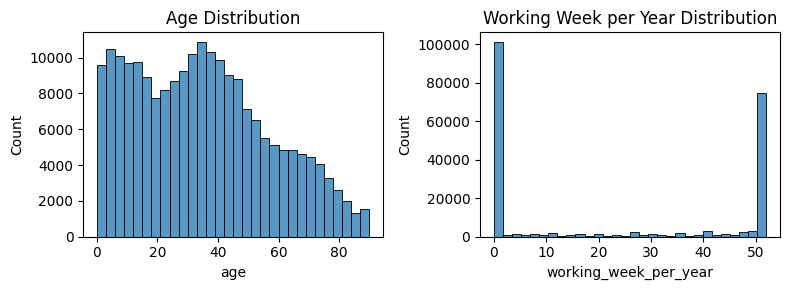

In [27]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns

# Plot the distribution of Age 
sns.histplot(df['age'], bins=30, ax=axs[0])
axs[0].set_title('Age Distribution')

# Plot the distribution of working_week_per_year 
sns.histplot(df['working_week_per_year'], bins=30, ax=axs[1])
axs[1].set_title('Working Week per Year Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


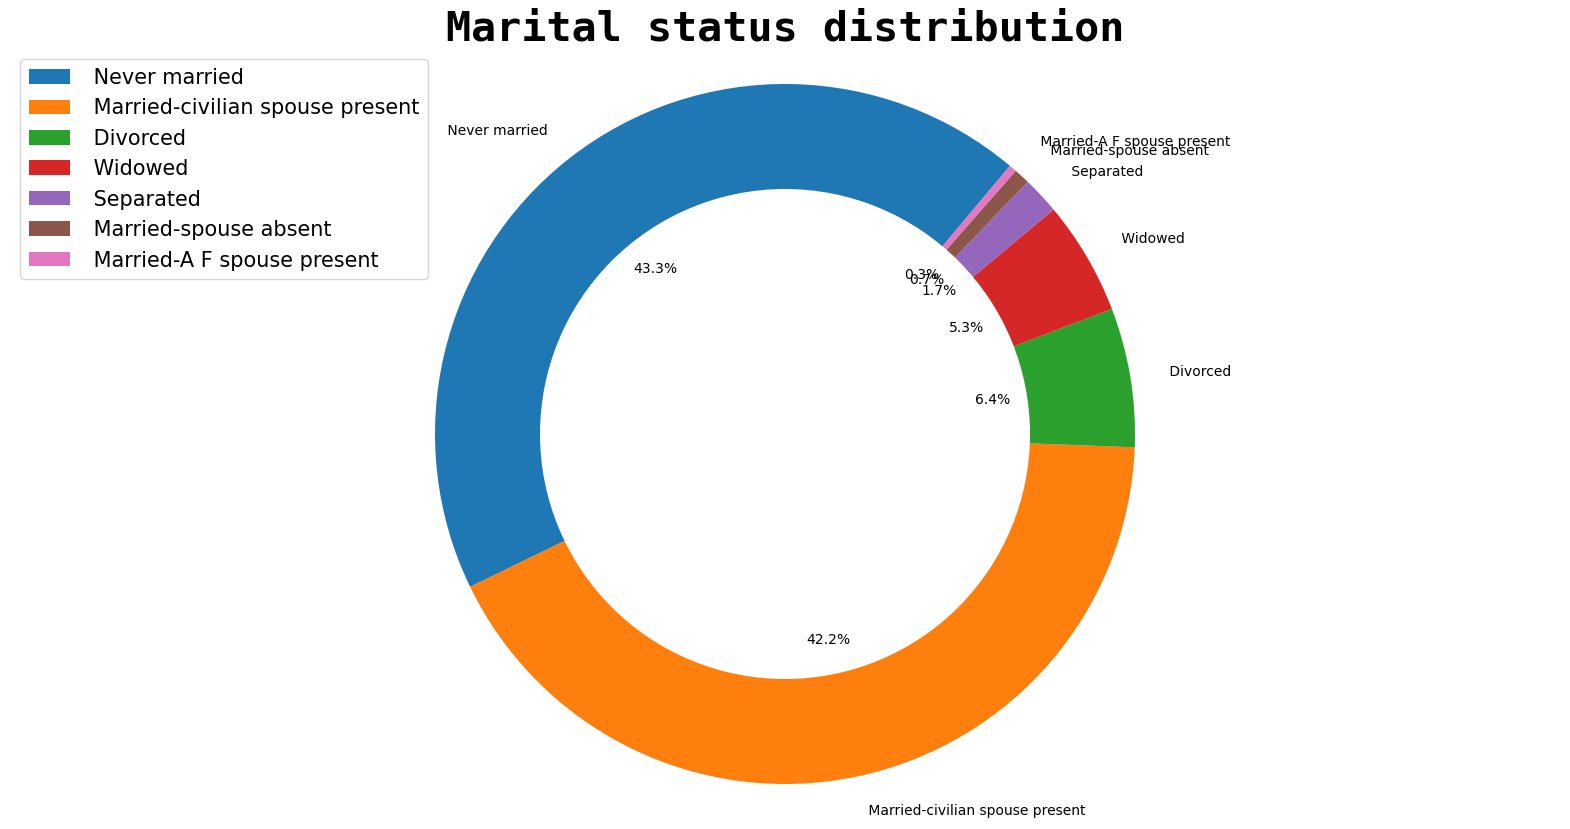

In [38]:
# Creating a donut chart for 'Marital status'
marital = df['marital_status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(marital.values, labels=marital.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

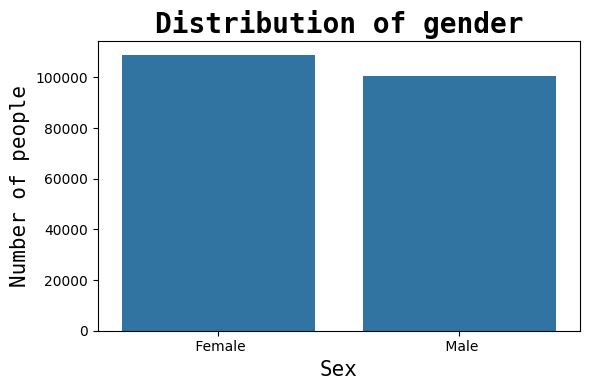

In [31]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the distribution of gender
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender.values, ax=ax)
ax.set_title('Distribution of gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
ax.set_xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
ax.set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 4: Income inequality in gender?</font>

In [32]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %


In [33]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')]))
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')]))

Males with income below limit: 90505
Females with income below limit: 105996


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Not a very high difference

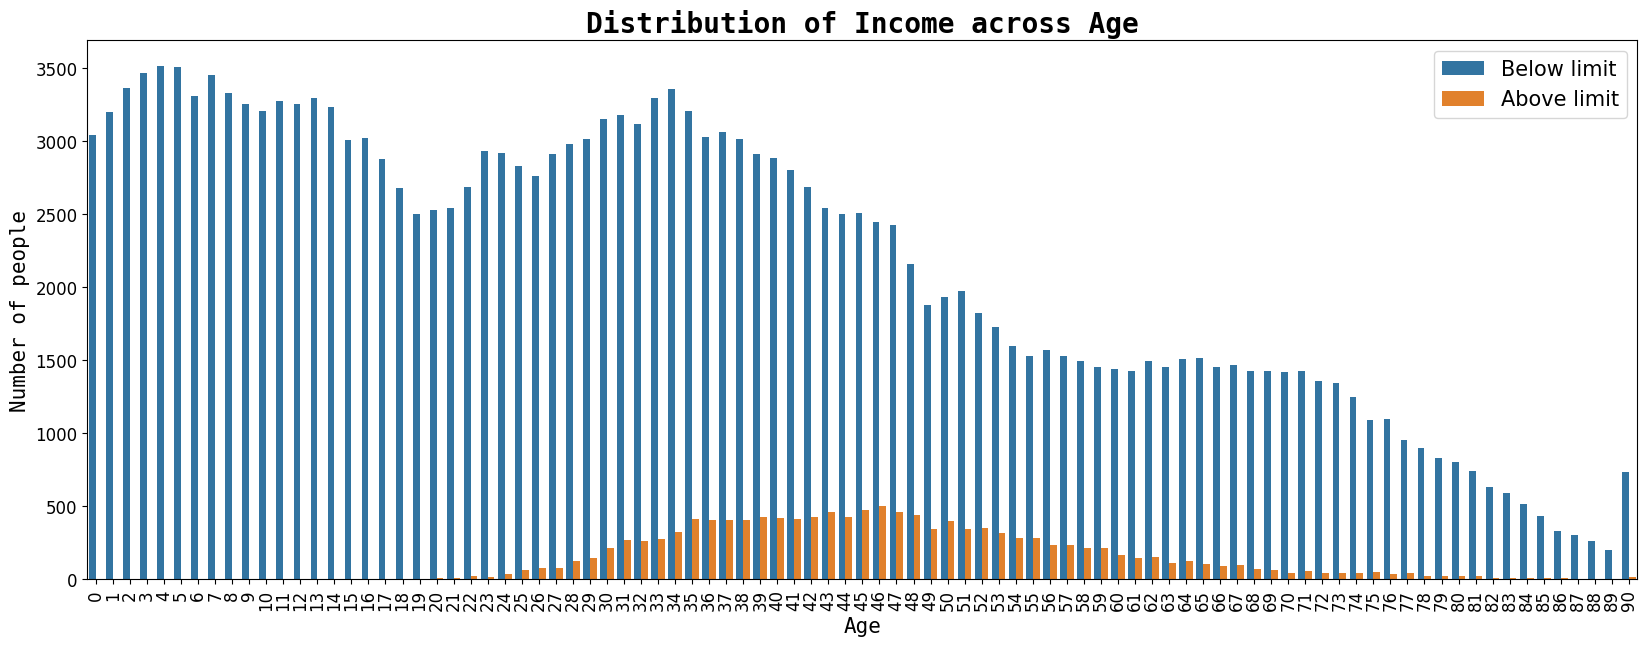

In [34]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

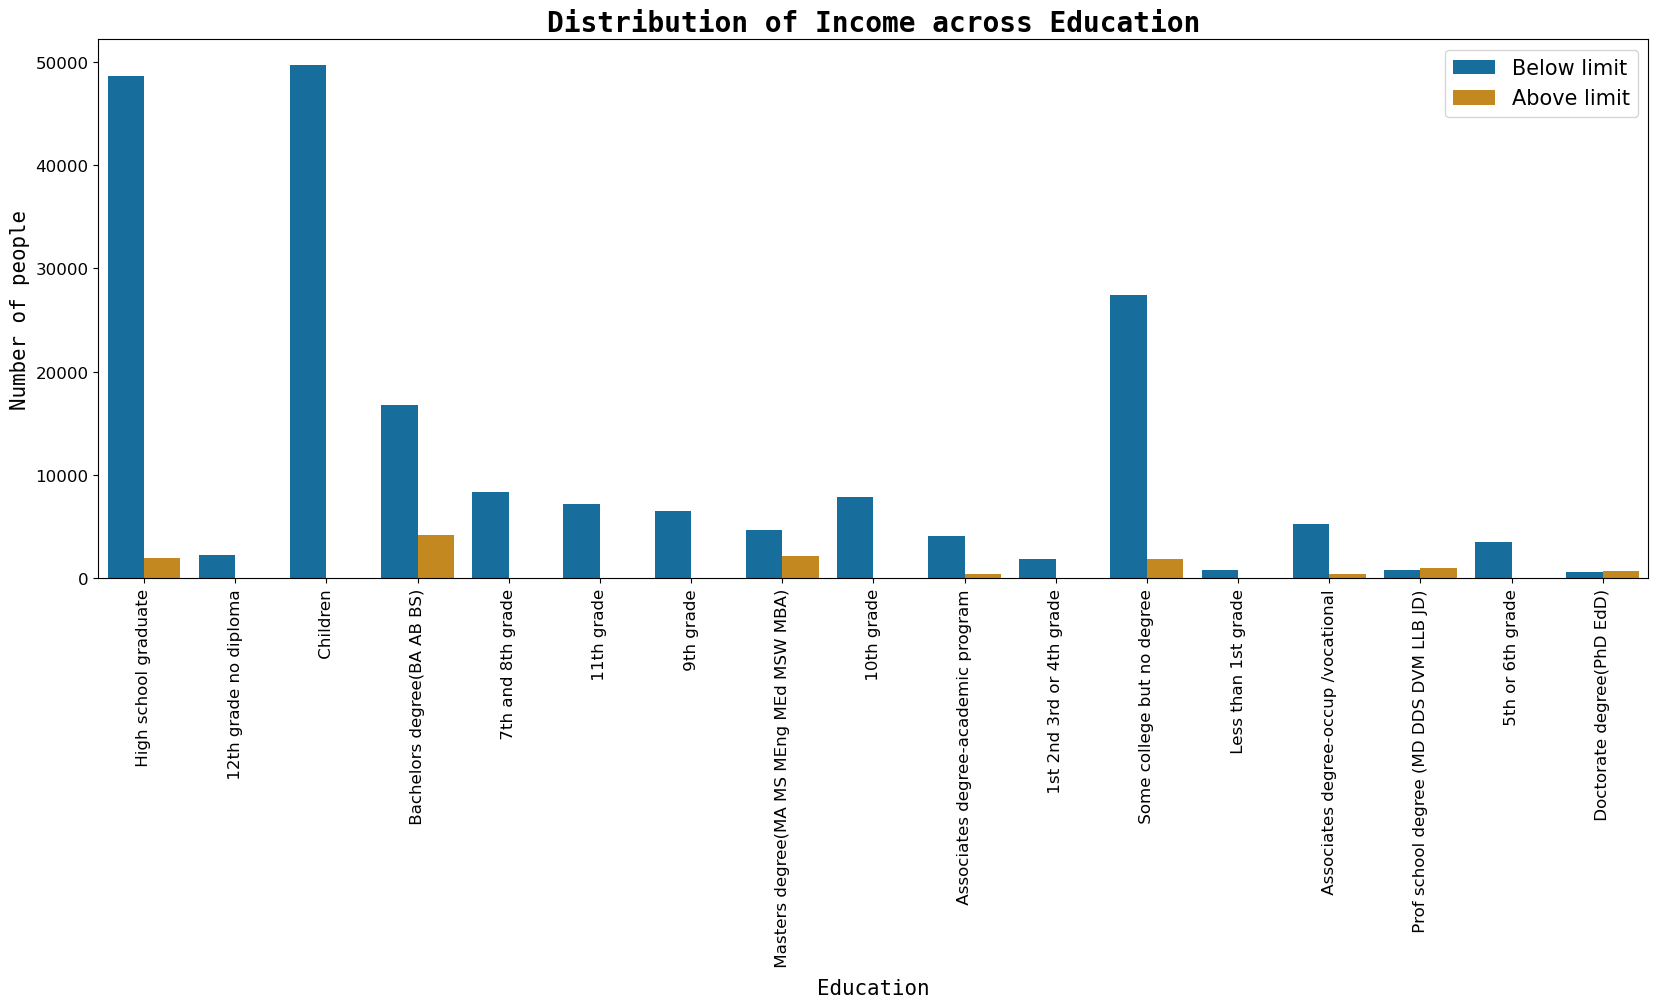

In [45]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

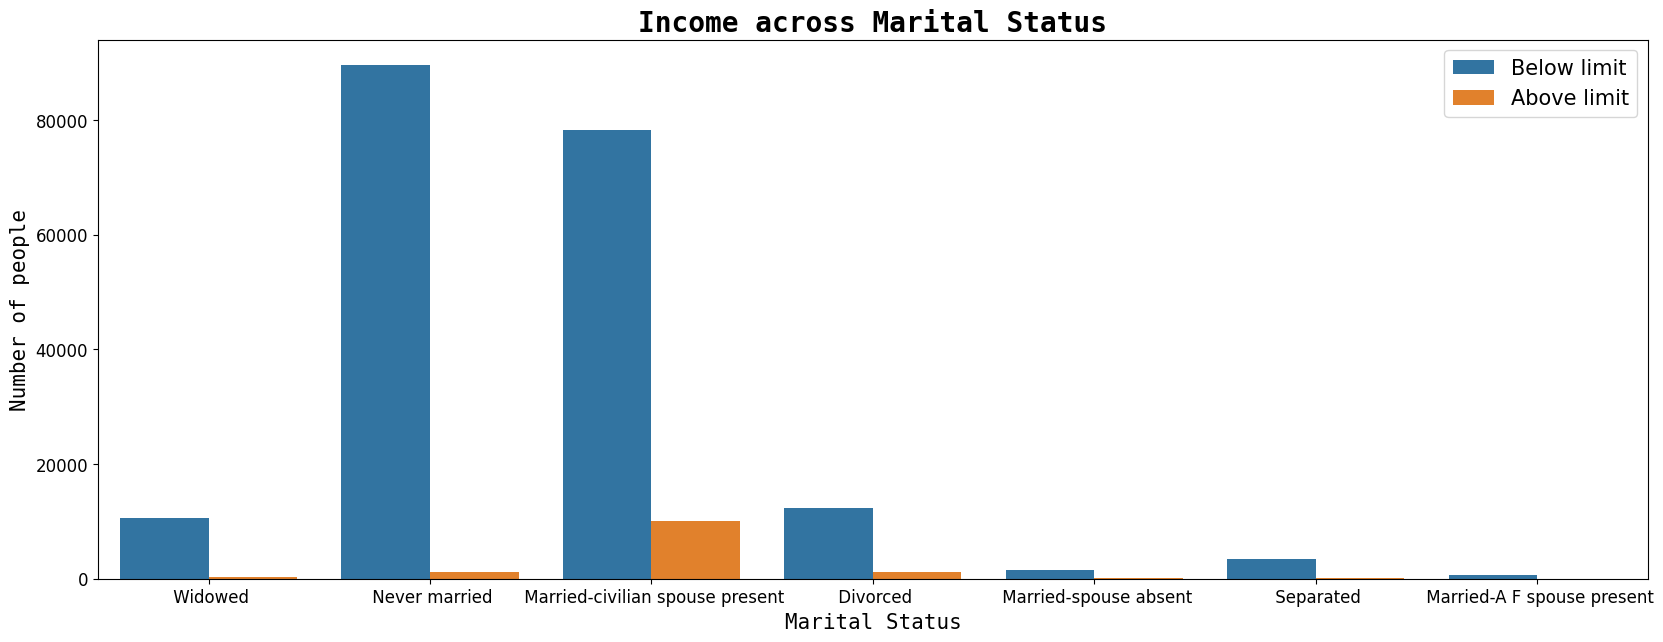

In [35]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income_above_limit'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

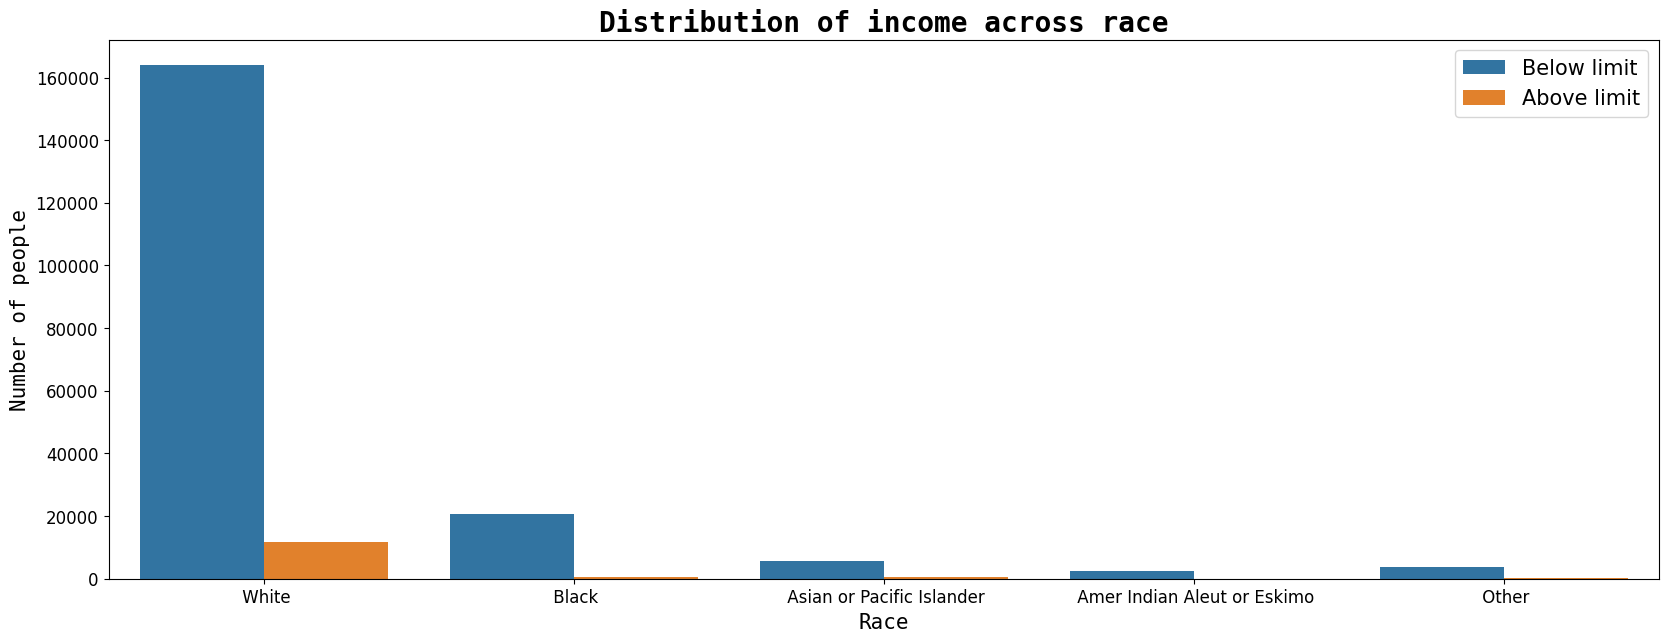

In [36]:
# Creating a countplot of income across race
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income_above_limit'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

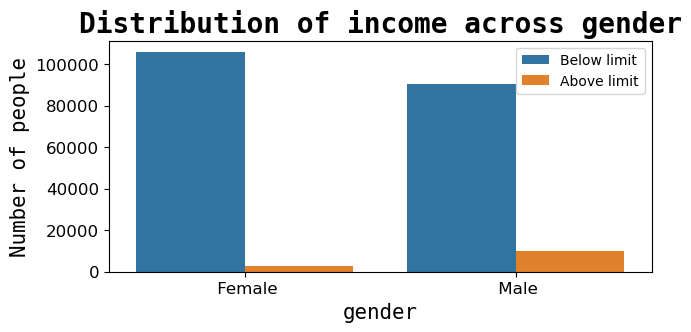

In [48]:
# Creating a countplot of income across sex
plt.figure(figsize=(7, 3))
sns.countplot(x=df['gender'], hue=df['income_above_limit'])
plt.title('Distribution of income across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [37]:
df.replace({'Below limit':0,'Above limit':1},inplace=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
In this dataset, the most number of people are young, white, male, high school graduates working 50 weeks per year.



# <span style="font-family:cursive;text-align:center">⚙️ Data Preprocessing</span>

### <span style="font-family:cursive;text-align:center">Null values handling</span>

In [40]:
# Checking null values
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [41]:
# dropping columns with more than 50% nan values
nan_cols_drop  = []
for cols in df.columns:
    if df[cols].isna().sum()/df.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [44]:
print(f'Dopping the following columns: ')
print(nan_cols_drop)

Dopping the following columns: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [45]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(nan_cols_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 43)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 29)


In [46]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                          0.0 %
age                         0.0 %
gender                      0.0 %
education                   0.0 %
marital_status              0.0 %
race                        0.0 %
is_hispanic                 0.0 %
employment_commitment       0.0 %
employment_stat             0.0 %
wage_per_hour               0.0 %
working_week_per_year       0.0 %
industry_code               0.0 %
industry_code_main          0.0 %
occupation_code             0.0 %
total_employed              0.0 %
household_stat              0.0 %
household_summary           0.0 %
vet_benefit                 0.0 %
tax_status                  0.0 %
gains                       0.0 %
losses                      0.0 %
stocks_status               0.0 %
citizenship                 0.0 %
mig_year                    0.0 %
country_of_birth_own       1.75 %
country_of_birth_father    3.43 %
country_of_birth_mother    3.11 %
importance_of_record        0.0 %
income_above_limit          0.0 %
dtype: object

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Country of birth own, father, mother are not some columns that may have any affect on model

In [47]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [48]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                       0.0 %
age                      0.0 %
gender                   0.0 %
education                0.0 %
marital_status           0.0 %
race                     0.0 %
is_hispanic              0.0 %
employment_commitment    0.0 %
employment_stat          0.0 %
wage_per_hour            0.0 %
working_week_per_year    0.0 %
industry_code            0.0 %
industry_code_main       0.0 %
occupation_code          0.0 %
total_employed           0.0 %
household_stat           0.0 %
household_summary        0.0 %
vet_benefit              0.0 %
tax_status               0.0 %
gains                    0.0 %
losses                   0.0 %
stocks_status            0.0 %
citizenship              0.0 %
mig_year                 0.0 %
importance_of_record     0.0 %
income_above_limit       0.0 %
dtype: object

age                         Axes(0.125,0.825775;0.032563x0.0542254)
employment_stat          Axes(0.164076,0.825775;0.032563x0.0542254)
wage_per_hour            Axes(0.203151,0.825775;0.032563x0.0542254)
working_week_per_year    Axes(0.242227,0.825775;0.032563x0.0542254)
industry_code            Axes(0.281303,0.825775;0.032563x0.0542254)
occupation_code          Axes(0.320378,0.825775;0.032563x0.0542254)
total_employed           Axes(0.359454,0.825775;0.032563x0.0542254)
vet_benefit              Axes(0.398529,0.825775;0.032563x0.0542254)
gains                    Axes(0.437605,0.825775;0.032563x0.0542254)
losses                   Axes(0.476681,0.825775;0.032563x0.0542254)
stocks_status            Axes(0.515756,0.825775;0.032563x0.0542254)
mig_year                 Axes(0.554832,0.825775;0.032563x0.0542254)
importance_of_record     Axes(0.593908,0.825775;0.032563x0.0542254)
income_above_limit       Axes(0.632983,0.825775;0.032563x0.0542254)
dtype: object

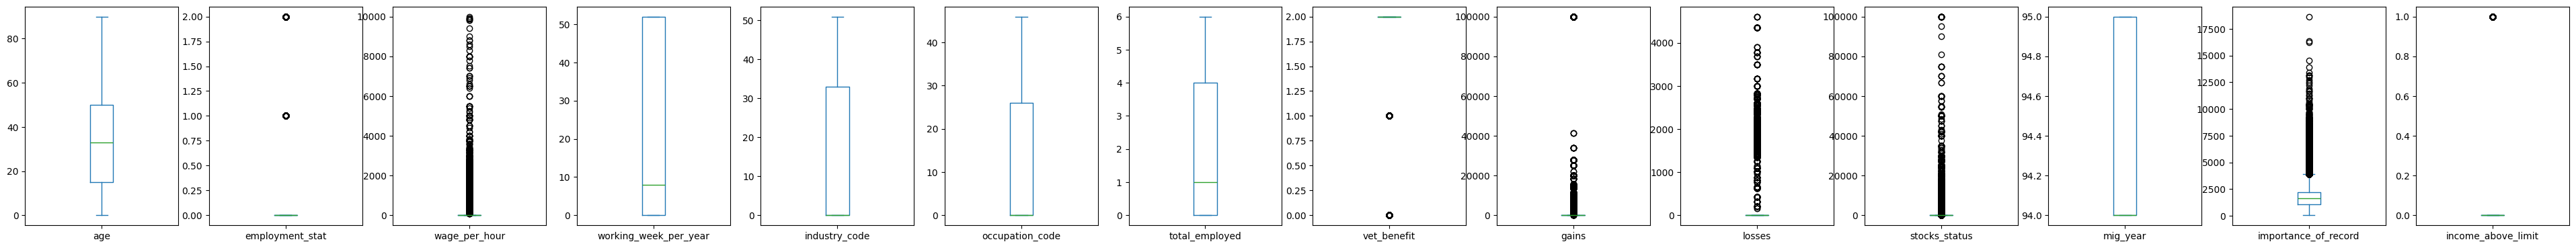

In [49]:
df.plot(kind="box", 
        vert=True,
        subplots=True,
        layout = (12,20),
        figsize=(70,60),
        sharex=False, 
        sharey=False 
        )

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Some of the possible ways to tackle this outlier is to transform values, clip values, drop values or to retain information

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

* Clipping doesn't seem nice option as it will delete the correct information
* We will check the number of outliers per column to see what can be done

In [52]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
    
    outs = []
    
    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)
    
    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)))

The percentage of outliers in wage_per_hour: 11856
The percentage of outliers in gains: 7830
The percentage of outliers in losses: 4062
The percentage of outliers in stocks_status: 22032
The percentage of outliers in importance_of_record: 6759


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

As the outliers percent are less we will proceed with retaining information and check if transformation can help

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Task 1: Can any transformation methods help in improving the models?

In [53]:
df.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,2,Householder,Householder,2,Head of household,0,0,292,Native,95,1779.74,0
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,2366.75,0
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,1693.42,0
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27,0
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,0


In [54]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,df[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [55]:
df.drop(columns=['household_stat'],axis=1,inplace=True)

In [56]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [57]:
print('The class Imbalance in the data is given below')
print(df['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
0    196501
1     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
0    93.795674
1     6.204326
Name: proportion, dtype: float64


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Clearly we have a highly imbalanced dataset available with us and hence we need to perform steps to mitigate the imbalance accordingly. So we are going Upsample the minority class (Here, minority class is 'Above limit')

### <span style="font-family:cursive;text-align:center">Fixing imbalanced dataset using Oversampling</span> 

In [58]:
x,y = df.drop(['ID','income_above_limit'],axis=1),df['income_above_limit']

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Task 2: Which over sampling method is better?

In [60]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
0    196501
1    196501
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
0    50.0
1    50.0
Name: proportion, dtype: float64


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.



###  <span style="font-family:cursive;text-align:center">Creating a train test split</span>

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [62]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [63]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,32,Male,High school graduate,Divorced,White,All other,Children or Armed Forces,0,0,52,49,Public administration,33,1,Householder,2,Head of household,0,0,0,Native,94,1207.45
1,74,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Spouse of householder,2,Nonfiler,0,0,0,Native,94,2242.96
2,43,Male,Associates degree-academic program,Never married,White,All other,Unemployed part- time,0,0,52,29,Transportation,15,6,Householder,2,Single,0,0,0,Native,95,3371.85
3,43,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,52,30,Communications,14,6,Householder,2,Single,0,0,125,Native,95,1315.73
4,22,Female,Some college but no degree,Never married,White,Other Spanish,Not in labor force,0,0,0,0,Not in universe or children,0,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,691.33


In [64]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,28,Male,High school graduate,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,52,4,Construction,34,2,Householder,2,Joint both under 65,0,0,0,Native,94,905.79
1,21,Male,High school graduate,Never married,White,All other,Full-time schedules,0,800,45,4,Construction,39,6,Householder,2,Single,27828,0,0,Native,95,1299.69
2,43,Female,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,29,Transportation,38,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,3852.26
3,40,Female,11th grade,Widowed,White,Central or South American,Children or Armed Forces,0,650,52,33,Retail trade,26,3,Householder,2,Head of household,0,0,0,Native,94,1081.40
4,6,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,3522.25


###  <span style="font-family:cursive;text-align:center">Encoding</span>

In [65]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [66]:
X_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,marital_status_ Divorced,marital_status_ Married-A F spouse present,marital_status_ Married-civilian spouse present,marital_status_ Married-spouse absent,marital_status_ Never married,marital_status_ Separated,marital_status_ Widowed,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,is_hispanic_ All other,is_hispanic_ Central or South American,is_hispanic_ Chicano,is_hispanic_ Cuban,is_hispanic_ Do not know,is_hispanic_ Mexican (Mexicano),is_hispanic_ Mexican-American,is_hispanic_ NA,is_hispanic_ Other Spanish,is_hispanic_ Puerto Rican,employment_commitment_ Children or Armed Forces,employment_commitment_ Full-time schedules,employment_commitment_ Not in labor force,employment_commitment_ PT for econ reasons usually FT,employment_commitment_ PT for econ reasons usually PT,employment_commitment_ PT for non-econ reasons usually FT,employment_commitment_ Unemployed full-time,employment_commitment_ Unemployed part- time,industry_code_main_ Agriculture,industry_code_main_ Armed Forces,industry_code_main_ Business and repair services,industry_code_main_ Communications,industry_code_main_ Construction,industry_code_main_ Education,industry_code_main_ Entertainment,industry_code_main_ Finance insurance and real estate,industry_code_main_ Forestry and fisheries,industry_code_main_ Hospital services,industry_code_main_ Manufacturing-durable goods,industry_code_main_ Manufacturing-nondurable goods,industry_code_main_ Medical except hospital,industry_code_main_ Mining,industry_code_main_ Not in universe or children,industry_code_main_ Other professional services,industry_code_main_ Personal services except private HH,industry_code_main_ Private household services,industry_code_main_ Public administration,industry_code_main_ Retail trade,industry_code_main_ Social services,industry_code_main_ Transportation,industry_code_main_ Utilities and sanitary services,industry_code_main_ Wholesale trade,household_summary_ Child 18 or older,household_summary_ Child under 18 ever married,household_summary_ Child under 18 never married,household_summary_ Group Quarters- Secondary individual,household_summary_ Householder,household_summary_ Nonrelative of householder,household_summary_ Other relative of householder,household_summary_ Spouse of householder,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_Native,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32,0,0,52,49,33,1,2,0,0,0,94,1207.45
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [67]:
newdf = X_train_encoded.copy()

In [68]:
X_train_encoded=X_train_encoded.drop(['gender_ Female','education_ 10th grade','marital_status_ Divorced','race_ Amer Indian Aleut or Eskimo','is_hispanic_ NA' ,'employment_commitment_ Children or Armed Forces', 'industry_code_main_ Communications' ,'household_summary_ Householder','tax_status_ Single','citizenship_Native' ], axis=1)

In [69]:
X_train_encoded.columns

Index(['gender_ Male', 'education_ 11th grade',
       'education_ 12th grade no diploma',
       'education_ 1st 2nd 3rd or 4th grade', 'education_ 5th or 6th grade',
       'education_ 7th and 8th grade', 'education_ 9th grade',
       'education_ Associates degree-academic program',
       'education_ Associates degree-occup /vocational',
       'education_ Bachelors degree(BA AB BS)', 'education_ Children',
       'education_ Doctorate degree(PhD EdD)',
       'education_ High school graduate', 'education_ Less than 1st grade',
       'education_ Masters degree(MA MS MEng MEd MSW MBA)',
       'education_ Prof school degree (MD DDS DVM LLB JD)',
       'education_ Some college but no degree',
       'marital_status_ Married-A F spouse present',
       'marital_status_ Married-civilian spouse present',
       'marital_status_ Married-spouse absent',
       'marital_status_ Never married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'race_ Asian or Pacific Islander

In [70]:
X_train_encoded.shape

(314401, 95)

In [71]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,marital_status_ Divorced,marital_status_ Married-A F spouse present,marital_status_ Married-civilian spouse present,marital_status_ Married-spouse absent,marital_status_ Never married,marital_status_ Separated,marital_status_ Widowed,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,is_hispanic_ All other,is_hispanic_ Central or South American,is_hispanic_ Chicano,is_hispanic_ Cuban,is_hispanic_ Do not know,is_hispanic_ Mexican (Mexicano),is_hispanic_ Mexican-American,is_hispanic_ NA,is_hispanic_ Other Spanish,is_hispanic_ Puerto Rican,employment_commitment_ Children or Armed Forces,employment_commitment_ Full-time schedules,employment_commitment_ Not in labor force,employment_commitment_ PT for econ reasons usually FT,employment_commitment_ PT for econ reasons usually PT,employment_commitment_ PT for non-econ reasons usually FT,employment_commitment_ Unemployed full-time,employment_commitment_ Unemployed part- time,industry_code_main_ Agriculture,industry_code_main_ Armed Forces,industry_code_main_ Business and repair services,industry_code_main_ Communications,industry_code_main_ Construction,industry_code_main_ Education,industry_code_main_ Entertainment,industry_code_main_ Finance insurance and real estate,industry_code_main_ Forestry and fisheries,industry_code_main_ Hospital services,industry_code_main_ Manufacturing-durable goods,industry_code_main_ Manufacturing-nondurable goods,industry_code_main_ Medical except hospital,industry_code_main_ Mining,industry_code_main_ Not in universe or children,industry_code_main_ Other professional services,industry_code_main_ Personal services except private HH,industry_code_main_ Private household services,industry_code_main_ Public administration,industry_code_main_ Retail trade,industry_code_main_ Social services,industry_code_main_ Transportation,industry_code_main_ Utilities and sanitary services,industry_code_main_ Wholesale trade,household_summary_ Child 18 or older,household_summary_ Child under 18 ever married,household_summary_ Child under 18 never married,household_summary_ Group Quarters- Secondary individual,household_summary_ Householder,household_summary_ Nonrelative of householder,household_summary_ Other relative of householder,household_summary_ Spouse of householder,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_Native,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28,0,0,52,4,34,2,2,0,0,0,94,905.79
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [72]:
X_test_encoded=X_test_encoded.drop(['gender_ Female','education_ 10th grade','marital_status_ Divorced','race_ Amer Indian Aleut or Eskimo','is_hispanic_ NA' ,'employment_commitment_ Children or Armed Forces', 'industry_code_main_ Communications' ,'household_summary_ Householder','tax_status_ Single','citizenship_Native' ], axis=1)

In [73]:
X_test_encoded.shape

(78601, 95)

In [74]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Task 3: Learn about Data Leakage.

### <span style="font-family:cursive;text-align:center">🤖 Baseline Modelling (Encoding after splitting)</span>

### <span style="font-family:cursive;text-align:center">Random Forest Classifier 🌲🌲🌲</span>

In [81]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [82]:
Y_pred_rf = rf.predict(X_test_encoded)

In [83]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_rf), 2))

Random Forest Classifier:
F1 score: 0.99


In [84]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     39578
           1       0.98      1.00      0.99     39023

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



### <span style="font-family:cursive;text-align:center">XGB Classifier 🌲🎄🌳🌴</span>  

In [85]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [87]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.91


In [88]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.93      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Very good accuracy on Random forest model as compared to XGB. But lets see how Random forest is working better?

In [91]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

##### Random Forest Train vs Test  

In [98]:
train_prob = pd.DataFrame(rf.predict_proba(X_train_encoded))
train_prob.columns = ['Below limit', 'Above limit']

test_prob = pd.DataFrame(rf.predict_proba(X_test_encoded))
test_prob.columns = ['Below limit', 'Above limit']

In [100]:
train_data,test_data = X_train_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [99]:
train_data.reset_index(inplace=True, drop=True)
train_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_train]
rf_merged_train = pd.concat([train_data, train_prob], axis = 1)

test_data.reset_index(inplace=True, drop=True)
test_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_merged_test = pd.concat([test_data, test_prob], axis = 1)

In [101]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [102]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=rf_merged_train, current_data=rf_merged_test, column_mapping = column_mapping)
classification_performance_report.save_html('rf_model.html')

#### Random Forest Train 🌲🌲🌲 vs XGB Classifier 🌲🎄🌳🌴  

In [103]:
rf_test_probas = pd.DataFrame(rf.predict_proba(X_test_encoded))
rf_test_probas.columns = ['Below limit', 'Above limit']

xgb_test_probas = pd.DataFrame(xgb.predict_proba(X_test_encoded))
xgb_test_probas.columns = ['Below limit', 'Above limit']

In [104]:
rf_data,xgb_data = X_test_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [105]:
rf_data.reset_index(inplace=True, drop=True)
rf_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_final_data = pd.concat([rf_data, rf_test_probas], axis = 1)

xgb_data.reset_index(inplace=True, drop=True)
xgb_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
xgb_final_data = pd.concat([xgb_data, xgb_test_probas], axis = 1)

In [106]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [107]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=xgb_final_data, current_data=rf_final_data, column_mapping = column_mapping)
classification_performance_report.save_html('rf_vs_xgb.html')